<a href="https://colab.research.google.com/github/ivanjob64/Nair_Proyecto/blob/main/Modelos_de_Regresi%C3%B3n_VFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

%matplotlib inline

In [12]:
import pandas as pd
from flask import Flask, jsonify
from pyngrok import ngrok

# 1. Prepara tus datos
# Ejemplo: DataFrame cualquiera, aquí tú pondrías tus datos reales
data = {
    "Fecha": ["2025-12-01", "2025-12-02", "2025-12-03"],
    "Canal": ["QR", "AppSol", "Cajero"],
    "Monto": [1500.50, 2300.00, 800.75]
}
df = pd.DataFrame(data)

# 2. Crea la app Flask
app = Flask(__name__)

@app.route("/data", methods=["GET"])
def get_data():
    # Exporta en JSON formato "records" para que Power BI lo entienda bien
    return df.to_json(orient="records")

# 3. Expone el puerto con ngrok y levanta el servidor
public_url = ngrok.connect(5000, "http")
print("URL pública de la API:", public_url)
print("Endpoint para Power BI:", f"{public_url}/data")

app.run(port=5000)


URL pública de la API: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"
Endpoint para Power BI: NgrokTunnel: "https://maryann-uncommingled-ballistically.ngrok-free.dev" -> "http://localhost:5000"/data
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [07/Dec/2025 02:50:51] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [07/Dec/2025 02:52:06] "GET /data HTTP/1.1" 200 -


### Configurar Authtoken de ngrok

1. **Obtén tu Authtoken:** Ve a tu [dashboard de ngrok](https://dashboard.ngrok.com/get-started/your-authtoken) (necesitarás una cuenta y haber iniciado sesión).
2. **Copia el Authtoken:** En la sección 'Your Authtoken', encontrarás un token similar a `2hL5...`.
3. **Ejecuta la siguiente celda:** Reemplaza `'YOUR_NGROK_AUTHTOKEN'` con el token que copiaste.

In [10]:
from pyngrok import ngrok

# Reemplaza 'YOUR_NGROK_AUTHTOKEN' con tu authtoken real de ngrok
ngrok.set_auth_token('35tX7B3Cib1BC7seFNyowX8e4Nr_7aGVesw5vDqtGsHfXBWvV')

print("Authtoken de ngrok configurado exitosamente.")

Authtoken de ngrok configurado exitosamente.


Después de configurar el authtoken, puedes intentar ejecutar la celda `NzK6pf78qWHJ` nuevamente para exponer tu aplicación Flask.

In [9]:
pip install pyngrok

In [ ]:
mpl.style.use(['ggplot'])

In [ ]:
source_file="servicios.csv"
# Creamos un dataframe a partir del archivo csv descargado
df_servicios2 = pd.read_csv(source_file, sep=';',  encoding='latin-1')
tamano_bytes = os.path.getsize(source_file)
#tamaño de archivo
tamano_mb = tamano_bytes / (1024 * 1024)
print(f"📁 Tamaño del archivo: {tamano_mb:.2f} MB ({tamano_bytes:,} bytes)")
df_servicios2.shape

📁 Tamaño del archivo: 607.47 MB (636,981,954 bytes)


(5590161, 10)

In [ ]:
# Estandarización de datos: Asegurar que los campos de tipo fecha son campos de tipo datetime
df_servicios2['FechaHoraConsumo'] = pd.to_datetime(df_servicios2['FechaHoraConsumo'], errors='coerce')
df_servicios2['FechaHoraRespuesta'] = pd.to_datetime(df_servicios2['FechaHoraRespuesta'], errors='coerce')
df_servicios2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5590161 entries, 0 to 5590160
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  int64         
 1   codCliente          object        
 2   canal               int64         
 3   empresaId           int64         
 4   empresa             object        
 5   estado              int64         
 6   intentos            int64         
 7   respuesta           object        
 8   FechaHoraConsumo    datetime64[ns]
 9   FechaHoraRespuesta  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 426.5+ MB


In [ ]:
df_servicios2.rename(columns={'ï»¿id': 'id'}, inplace=True)
df_servicios=df_servicios2[(df_servicios2['FechaHoraConsumo'] < '2025-10-01')]
df_servicios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518946 entries, 0 to 5590160
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  int64         
 1   codCliente          object        
 2   canal               int64         
 3   empresaId           int64         
 4   empresa             object        
 5   estado              int64         
 6   intentos            int64         
 7   respuesta           object        
 8   FechaHoraConsumo    datetime64[ns]
 9   FechaHoraRespuesta  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 463.2+ MB


In [ ]:
df_servicios['empresaId']=df_servicios['empresaId']+10000
df_servicios['codCliente'] = df_servicios['codCliente'].apply(lambda x: x[:3] + '*' * (len(x) - 3))

In [ ]:
df_servicios.head(5)

/tmp/ipython-input-2328562592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_servicios['empresaId']=df_servicios['empresaId']+10000


,id,codCliente,canal,empresaId,empresa,estado,intentos,respuesta,FechaHoraConsumo,FechaHoraRespuesta
0,555555,101******************,240,10004,EPSAS,1,0,Pago procesado correctamente,2024-06-15 12:16:11,2024-06-15 12:16:11
1,555556,101******,240,10006,DELAPAZ,1,0,Pago finalizado exitosamente,2024-06-15 12:16:22,2024-06-15 12:16:22
2,555557,101******,240,10006,DELAPAZ,1,0,Pago finalizado exitosamente,2024-06-15 12:16:22,2024-06-15 12:16:22
3,555558,102******************,240,10004,EPSAS,1,0,Pago procesado correctamente,2024-06-15 12:16:43,2024-06-15 12:16:43
4,555559,139***,223,10007,YPFB,1,0,Pago confirmado,2024-06-15 12:16:47,2024-06-15 12:16:47


**Preparación de Datos:**

In [ ]:
#lista registros nulos
df_servicios[df_servicios.isnull().any(axis=1)]

,id,codCliente,canal,empresaId,empresa,estado,intentos,respuesta,FechaHoraConsumo,FechaHoraRespuesta


In [13]:
#cantidad de registros nulos
df_servicios.isna().sum()
#llena campos vacíos por la media
#df_servicios.fillna(df_servicios.mean())

NameError: name 'df_servicios' is not defined

In [ ]:
#lista registros duplicados
df_servicios.duplicated().sum()
#elimina registros duplicados
#f_servicios.dropduplicated()

np.int64(0)

In [ ]:
#elimina registros nulos
df_servicios = df_servicios.dropna()

In [ ]:
#listar valores únicos de campo intentos
df_servicios['intentos'].unique()

array([0, 5, 1, 4, 2, 3])

In [ ]:
#completar con valor 0 campo codCliente que contienen valores nulos  ***NO
#df_servicios['codCliente'] = df_servicios['codCliente'].fillna(0)
#df_servicios[df_servicios.isnull().any(axis=1)]

In [ ]:
fecha_min = df_servicios['FechaHoraConsumo'].min()
fecha_max = df_servicios['FechaHoraConsumo'].max()

print("Fecha mínima:", fecha_min)
print("Fecha máxima:", fecha_max)

Fecha mínima: 2024-04-01 04:22:08
Fecha máxima: 2025-09-30 23:54:53


In [ ]:
# listar empresas y cantidad de pagos
conteo = df_servicios['empresa'].value_counts().reset_index()
conteo.columns = ['empresa', 'frecuencia']
print(conteo)

      empresa  frecuencia
0        YPFB     1527220
1     DELAPAZ     1487052
2       EPSAS      624241
3         CRE      545826
4       ELFEC      442332
5    SAGUAPAC      222195
6       CESSA      177987
7      ELAPAS       65020
8      SEMAPA       64204
9     Cooplan       57257
10       ENDE       50229
11      SETAR       49116
12       SELA       43579
13     EMAPAV       43119
14    COSAALT       30332
15    COOPLAN       27704
16      SEPSA       22423
17    EMTAGAS       18669
18    COSIMBO       15637
19  ENDE BENI        4471
20      CAPAG         333


In [ ]:
# listar canales y cantidad de pagos
conteo = df_servicios['canal'].value_counts().reset_index()
conteo.columns = ['canal', 'frecuencia']
print(conteo)

   canal  frecuencia
0    240     3257951
1    223      899089
2    102      722520
3    101      633796
4      5        2787
5    224        2603
6      0         101
7    104          78
8    107          21


In [ ]:
#Crear columnas de periodo: año-mes, día y hora
df_servicios['FechaHoraConsumo'] = pd.to_datetime(df_servicios['FechaHoraConsumo'])
df_servicios['mes'] = df_servicios['FechaHoraConsumo'].dt.to_period('M')
df_servicios['dia_promedio'] = df_servicios['FechaHoraConsumo'].dt.dayofweek
df_servicios['hora_promedio'] = df_servicios['FechaHoraConsumo'].dt.hour



In [ ]:
df_servicios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5518946 entries, 0 to 5590160
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   id                  int64         
 1   codCliente          object        
 2   canal               int64         
 3   empresaId           int64         
 4   empresa             object        
 5   estado              int64         
 6   intentos            int64         
 7   respuesta           object        
 8   FechaHoraConsumo    datetime64[ns]
 9   FechaHoraRespuesta  datetime64[ns]
 10  mes                 period[M]     
 11  dia_promedio        int32         
 12  hora_promedio       int32         
dtypes: datetime64[ns](2), int32(2), int64(5), object(3), period[M](1)
memory usage: 547.4+ MB


In [17]:
pagos_mes = df_servicios.groupby(['empresa', 'mes']).agg(
    total_pagos=('id', 'count'),
    #exitos=('estado', lambda x: (x == 1).sum()),
    #errores=('estado', lambda x: (x != 1).sum()),
    tasa_exitos=('estado', lambda x: (x == 1).mean()),
    #tasa_errores=('estado', lambda x: (x != 1).mean()),
    promedio_intentos=('intentos', 'mean'),
    hora_promedio=('hora_promedio', 'mean'),
    dia_promedio=('dia_promedio', 'mean'),
).reset_index()

NameError: name 'df_servicios' is not defined

In [16]:
#Calcular incremento mensual por empresa
pagos_mes = pagos_mes.sort_values(by=['empresa', 'mes'])
pagos_mes['incremento'] = pagos_mes.groupby('empresa')['total_pagos'].diff().fillna(0)

#calculo de variable objetivo (incremento) de pagos con respecto al anterior mes
pagos_mes['incremento'] = pagos_mes.groupby('empresa')['total_pagos'].diff()
#Reemplazar valores nulos (primer mes sin comparación)
pagos_mes['incremento'] = pagos_mes['incremento'].fillna(0)


NameError: name 'pagos_mes' is not defined

In [15]:
# Agregar columna para indicar tendencia
pagos_mes['tendencia'] = pagos_mes['incremento'].apply(
    lambda x: 'Incremento'
    if x > 0 else ('Disminución' if x < 0 else 'Sin cambio')
)


NameError: name 'pagos_mes' is not defined

In [ ]:
pagos_mes['incremento'] = pagos_mes['incremento'].astype('int64')
pagos_mes['mes_num'] = pagos_mes['mes'].dt.month
pagos_mes['var_pagos'] = pagos_mes['total_pagos'].pct_change().fillna(0)

In [14]:
empresas = pagos_mes['empresa'].unique()
print (empresas)

NameError: name 'pagos_mes' is not defined

### Re-creando `df_servicios` y `pagos_mes`

Debido a un posible reinicio del kernel o problemas de estado, parece que `df_servicios` y `pagos_mes` no están definidos. Voy a ejecutar los pasos necesarios para volver a crearlos.

In [20]:
# Re-crear df_servicios
source_file="servicios.csv"
df_servicios2 = pd.read_csv(source_file, sep=';',  encoding='latin-1')
df_servicios2['FechaHoraConsumo'] = pd.to_datetime(df_servicios2['FechaHoraConsumo'], errors='coerce')
df_servicios2['FechaHoraRespuesta'] = pd.to_datetime(df_servicios2['FechaHoraRespuesta'], errors='coerce')
df_servicios=df_servicios2[(df_servicios2['FechaHoraConsumo'] < '2025-10-01')]
df_servicios['empresaId']=df_servicios['empresaId']+10000
df_servicios['codCliente'] = df_servicios['codCliente'].apply(lambda x: x[:3] + '*' * (len(x) - 3))
df_servicios = df_servicios.dropna()

# Re-crear columnas de periodo
df_servicios['FechaHoraConsumo'] = pd.to_datetime(df_servicios['FechaHoraConsumo'])
df_servicios['mes'] = df_servicios['FechaHoraConsumo'].dt.to_period('M')
df_servicios['dia_promedio'] = df_servicios['FechaHoraConsumo'].dt.dayofweek
df_servicios['hora_promedio'] = df_servicios['FechaHoraConsumo'].dt.hour

# Re-crear pagos_mes
pagos_mes = df_servicios.groupby(['empresa', 'mes']).agg(
    total_pagos=('id', 'count'),
    tasa_exitos=('estado', lambda x: (x == 1).mean()),
    promedio_intentos=('intentos', 'mean'),
    hora_promedio=('hora_promedio', 'mean'),
    dia_promedio=('dia_promedio', 'mean')
).reset_index()

pagos_mes = pagos_mes.sort_values(by=['empresa', 'mes'])
pagos_mes['incremento'] = pagos_mes.groupby('empresa')['total_pagos'].diff().fillna(0)
pagos_mes['tendencia'] = pagos_mes['incremento'].apply(
    lambda x: 'Incremento'
    if x > 0 else ('Disminución' if x < 0 else 'Sin cambio')
)
pagos_mes['incremento'] = pagos_mes['incremento'].astype('int64')
pagos_mes['mes_num'] = pagos_mes['mes'].dt.month
pagos_mes['var_pagos'] = pagos_mes['total_pagos'].pct_change().fillna(0)
mapa_tendencia = {'Disminución': -1, 'Sin cambio': 0, 'Incremento': 1}
pagos_mes['tendencia_num'] = pagos_mes['tendencia'].map(mapa_tendencia)

print("✅ DataFrames `df_servicios` y `pagos_mes` re-creados exitosamente.")

FileNotFoundError: [Errno 2] No such file or directory: 'servicios.csv'

### Actualizando la variable `data`

Ahora, según tu solicitud, voy a actualizar la variable `data` para que contenga la lista de empresas únicas de `pagos_mes`.

In [19]:
empresas_unicas = pagos_mes['empresa'].unique().tolist()
data = {"empresas_unicas": empresas_unicas}

display(data)
print("✅ Variable `data` actualizada con empresas únicas.")

NameError: name 'pagos_mes' is not defined

In [ ]:
pagos_mes.info()

In [ ]:
#agregar campo tendencia_num de tipo numérico
mapa_tendencia = {'Disminución': -1, 'Sin cambio': 0, 'Incremento': 1}
pagos_mes['tendencia_num'] = pagos_mes['tendencia'].map(mapa_tendencia)
pagos_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   empresa            314 non-null    object   
 1   mes                314 non-null    period[M]
 2   total_pagos        314 non-null    int64    
 3   tasa_exitos        314 non-null    float64  
 4   promedio_intentos  314 non-null    float64  
 5   hora_promedio      314 non-null    float64  
 6   dia_promedio       314 non-null    float64  
 7   incremento         314 non-null    int64    
 8   tendencia          314 non-null    object   
 9   mes_num            314 non-null    int64    
 10  var_pagos          314 non-null    float64  
 11  tendencia_num      314 non-null    int64    
dtypes: float64(5), int64(4), object(2), period[M](1)
memory usage: 29.6+ KB


In [ ]:
pagos_mes.head(5)

,empresa,mes,total_pagos,tasa_exitos,promedio_intentos,hora_promedio,dia_promedio,incremento,tendencia,mes_num,var_pagos,tendencia_num
0,CAPAG,2025-06,34,1.000000,0.000000,15.323529,2.617647,0,Sin cambio,6,0.000000,0
1,CAPAG,2025-07,59,1.000000,0.000000,12.881356,2.271186,25,Incremento,7,0.735294,1
2,CAPAG,2025-08,90,0.988889,0.044444,13.522222,2.533333,31,Incremento,8,0.525424,1
3,CAPAG,2025-09,150,0.993333,0.033333,13.886667,2.266667,60,Incremento,9,0.666667,1
4,CESSA,2024-04,7971,0.996487,0.009284,12.274244,2.040647,0,Sin cambio,4,52.140000,0


In [ ]:
#permitirá detectar patrones específicos por época del año
pagos_mes['mes_num'] = pagos_mes['mes'].dt.month
pagos_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   empresa            314 non-null    object   
 1   mes                314 non-null    period[M]
 2   total_pagos        314 non-null    int64    
 3   tasa_exitos        314 non-null    float64  
 4   promedio_intentos  314 non-null    float64  
 5   hora_promedio      314 non-null    float64  
 6   dia_promedio       314 non-null    float64  
 7   incremento         314 non-null    int64    
 8   tendencia          314 non-null    object   
 9   mes_num            314 non-null    int64    
 10  var_pagos          314 non-null    float64  
 11  tendencia_num      314 non-null    int64    
dtypes: float64(5), int64(4), object(2), period[M](1)
memory usage: 29.6+ KB


In [ ]:
#Crear variable var_pagos que calcula la variación porcentual de pagos entre registros consecutivos
pagos_mes['var_pagos'] = pagos_mes['total_pagos'].pct_change().fillna(0)
pagos_mes.info()

In [ ]:
pagos_mes.isna().sum()

,0
empresa,0
mes,0
total_pagos,0
tasa_exitos,0
promedio_intentos,0
hora_promedio,0
dia_promedio,0
incremento,0
tendencia,0
mes_num,0


In [ ]:
#calcular matriz de correlación
corr_pagos = pagos_mes.corr(numeric_only=True)
corr_pagos

,total_pagos,tasa_exitos,promedio_intentos,hora_promedio,dia_promedio,incremento,mes_num,var_pagos,tendencia_num
total_pagos,1.000000,0.063076,-0.066929,0.194238,-0.079660,0.446548,-0.026646,-0.017231,-0.040330
tasa_exitos,0.063076,1.000000,-0.991561,0.386804,-0.370718,0.011539,-0.066588,0.033024,-0.007309
promedio_intentos,-0.066929,-0.991561,1.000000,-0.331569,0.352826,-0.010209,0.071061,-0.030869,0.016624
hora_promedio,0.194238,0.386804,-0.331569,1.000000,-0.136727,0.089065,-0.034387,-0.046196,0.066662
dia_promedio,-0.079660,-0.370718,0.352826,-0.136727,1.000000,-0.161166,-0.018202,-0.040883,-0.086206
incremento,0.446548,0.011539,-0.010209,0.089065,-0.161166,1.000000,0.039808,-0.005267,0.404304
mes_num,-0.026646,-0.066588,0.071061,-0.034387,-0.018202,0.039808,1.000000,-0.002490,0.021196
var_pagos,-0.017231,0.033024,-0.030869,-0.046196,-0.040883,-0.005267,-0.002490,1.000000,0.025238
tendencia_num,-0.040330,-0.007309,0.016624,0.066662,-0.086206,0.404304,0.021196,0.025238,1.000000


<Axes: >

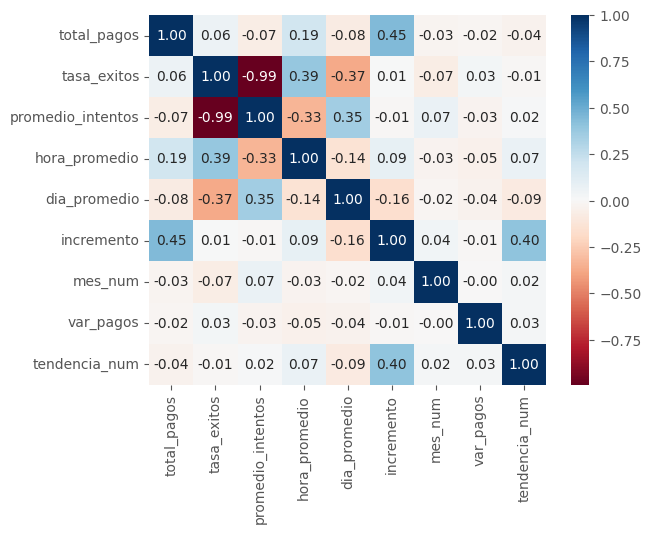

In [ ]:
#matriz de correlación
sns.heatmap(corr_pagos, annot=True, cmap="RdBu", fmt=".2f")

In [ ]:
#definir variable objetivo y prodictorias
y = pagos_mes['incremento']
X = pagos_mes[['total_pagos', 'tasa_exitos','promedio_intentos','tendencia_num','mes_num','var_pagos','hora_promedio','dia_promedio']]



In [ ]:
#ver coheficientes del modelo
print("✅ Dataset enriquecido con éxito")
print("Dimensiones de X:", X.shape)
print("Variables predictoras:", list(X.columns))

✅ Dataset enriquecido con éxito
Dimensiones de X: (314, 8)
Variables predictoras: ['total_pagos', 'tasa_exitos', 'promedio_intentos', 'tendencia_num', 'mes_num', 'var_pagos', 'hora_promedio', 'dia_promedio']


In [ ]:
#dividir datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#mostrar cantidad de datos entrenados

print(f" X_train → {X_train.shape[0]} registros y {X_train.shape[1]} columnas")
print(f" X_test  → {X_test.shape[0]} registros y {X_test.shape[1]} columnas")
print(f" y_train → {y_train.shape[0]} registros y 1 columna (variable objetivo)")
print(f" y_test  → {y_test.shape[0]} registros y 1 columna (variable objetivo)")

 X_train → 251 registros y 8 columnas
 X_test  → 63 registros y 8 columnas
 y_train → 251 registros y 1 columna (variable objetivo)
 y_test  → 63 registros y 1 columna (variable objetivo)


**PRIMER MODELO: REGRESIÓN LINEAL MÚLTIPLE**

In [ ]:
#NORMALIZACIÓN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Crear modelo
modelo = LinearRegression()

# Entrenar modelo con datos de entrenamiento
modelo.fit(X_train, y_train)

#ver coheficientes del modelo
print("Intercepto (β₀):", modelo.intercept_)
print("Coeficientes (β):", modelo.coef_)


Intercepto (β₀): 2492.449313346476
Coeficientes (β): [ 6.14784508e-02  1.57947249e+03  9.58916057e+02  1.81909142e+03
  5.62218770e+01 -1.26625353e+01 -8.09303320e+01 -1.88041279e+03]


In [ ]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)
# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("📊 Resultados del modelo de regresión lineal:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")

📊 Resultados del modelo de regresión lineal:
MAE (Error Absoluto Medio): 1392.74
RMSE (Raíz del Error Cuadrático Medio): 2093.67
R² (Coeficiente de determinación): 0.22


**SEGUNDO MODELO: RANDOM FOREST REGRESSOR**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Crear modelo RandomForest
rf_model = RandomForestRegressor(
    n_estimators=100,   # cantidad de árboles
    max_depth= 10,       # profundidad máxima de cada árbol

    random_state=42
)
# Entrenar
rf_model.fit(X_train, y_train)
# Predecir
y_pred = rf_model.predict(X_test)

# Evaluar desempeño
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Resultados RandomForestRegressor:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

📊 Resultados RandomForestRegressor:
MAE: 313.85
RMSE: 631.64
R²: 0.93


***CURVAS DE MODELOS DE REGRESIÓN***

In [ ]:
from sklearn.model_selection import learning_curve

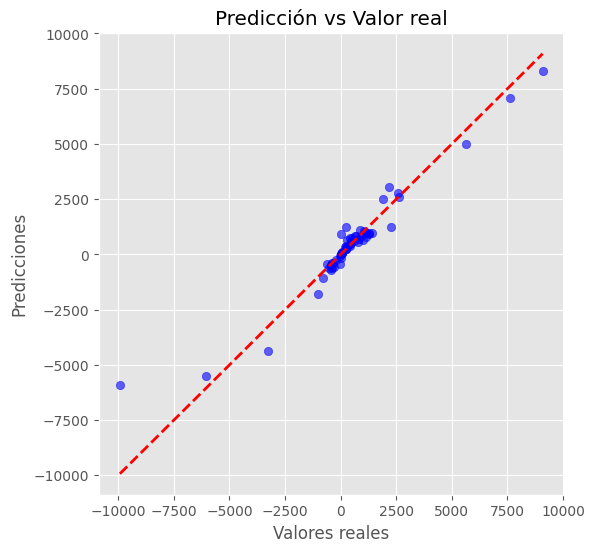

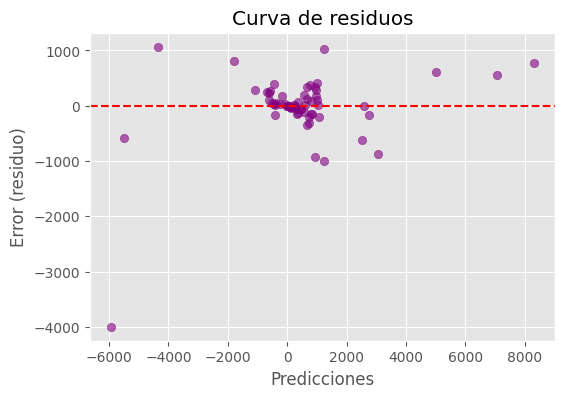

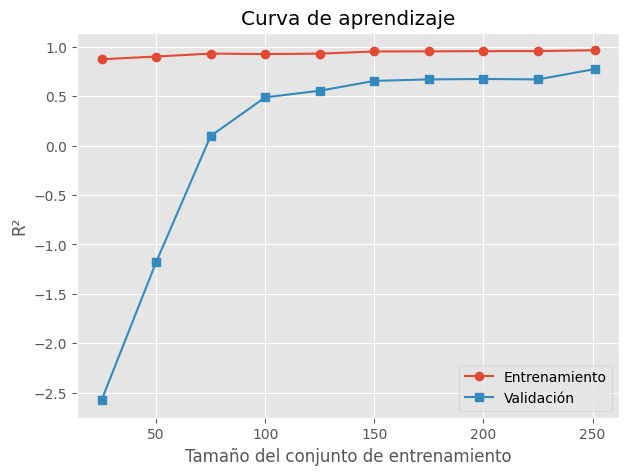

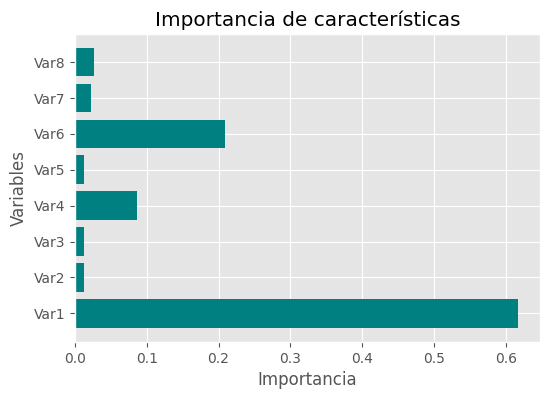

In [ ]:
# CURVA: Predicción vs Valor Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Valor real')
plt.grid(True)
plt.show()

# CURVA: Residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error (residuo)')
plt.title('Curva de residuos')
plt.grid(True)
plt.show()

#  CURVA: Learning Curve (Curva de aprendizaje)
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5,
    scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 's-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

# CURVA: Importancia de características
if hasattr(rf_model, 'feature_importances_'):
    importancia = rf_model.feature_importances_
    features = [f'Var{i+1}' for i in range(X.shape[1])]
    plt.figure(figsize=(6,4))
    plt.barh(features, importancia, color='teal')
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title('Importancia de características')
    plt.grid(True, axis='x')
    plt.show()
else:
    print("⚠️ Este modelo no tiene atributo 'feature_importances_'.")

**XGBOOST REGRESSOR**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#dividir datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Crear modelo XGBRegressor
modelo_xgb = XGBRegressor(
    n_estimators=200,      # número de árboles
    learning_rate=0.1,     # tasa de aprendizaje
    max_depth=6,           # profundidad de los árboles
    random_state=42
)
#Entrenar
modelo_xgb.fit(X_train, y_train)
#Predecir
y_pred = modelo_xgb.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred)) #squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.9491249918937683
RMSE: 284993.40625
MAE: 300.6618347167969


***CURVAS DE MODELOS DE REGRESIÓN***

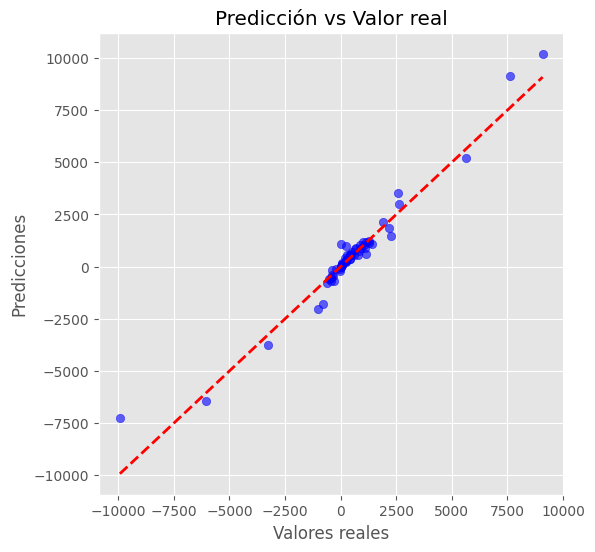

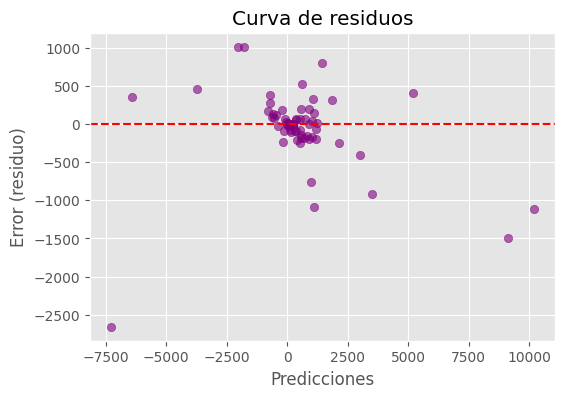

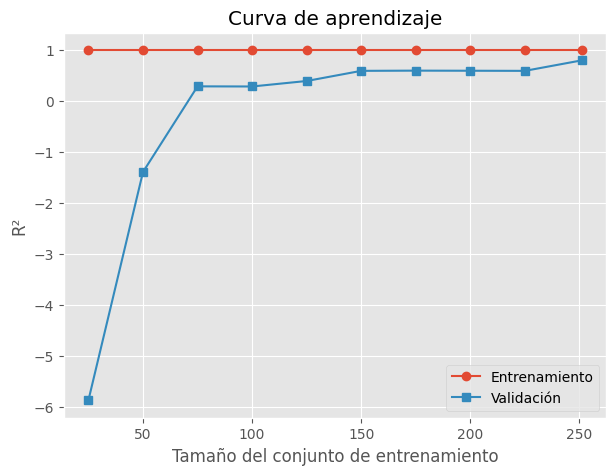

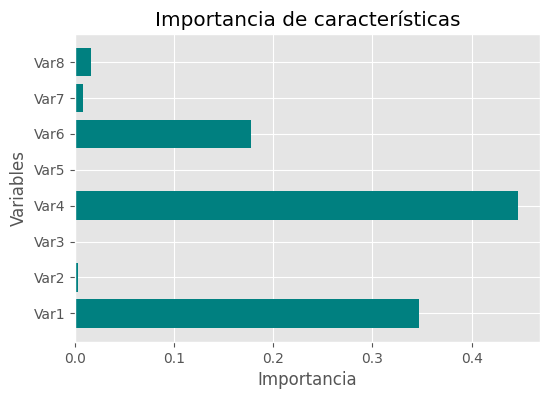

In [ ]:
# CURVA: Predicción vs Valor Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Valor real')
plt.grid(True)
plt.show()

# CURVA: Residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error (residuo)')
plt.title('Curva de residuos')
plt.grid(True)
plt.show()

#  CURVA: Learning Curve (Curva de aprendizaje)
train_sizes, train_scores, test_scores = learning_curve(
    modelo_xgb, X, y, cv=5,
    scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 's-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

# CURVA: Importancia de características
if hasattr(modelo_xgb, 'feature_importances_'):
    importancia = modelo_xgb.feature_importances_
    features = [f'Var{i+1}' for i in range(X.shape[1])]
    plt.figure(figsize=(6,4))
    plt.barh(features, importancia, color='teal')
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title('Importancia de características')
    plt.grid(True, axis='x')
    plt.show()
else:
    print("⚠️ Este modelo no tiene atributo 'feature_importances_'.")

**Gradient Boosting Regressor**

In [ ]:
#importar librerías
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Crear el modelo
gbr = GradientBoostingRegressor(
    n_estimators=200,     # número de árboles
    learning_rate=0.1,    # tasa de aprendizaje
    max_depth=5,          # profundidad máxima de cada árbol
    random_state=42
)

# Entrenar el modelo
gbr.fit(X_train, y_train)
#predicción
y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R2: 0.9432
RMSE: 563.9350
MAE: 285.4054


***CURVAS DE MODELOS DE REGRESIÓN***

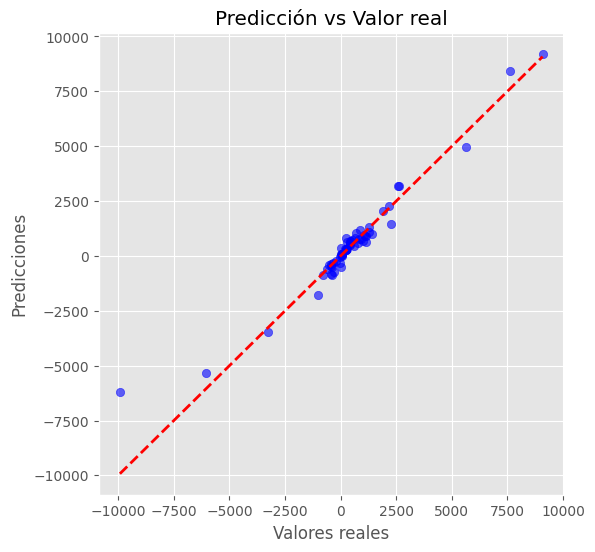

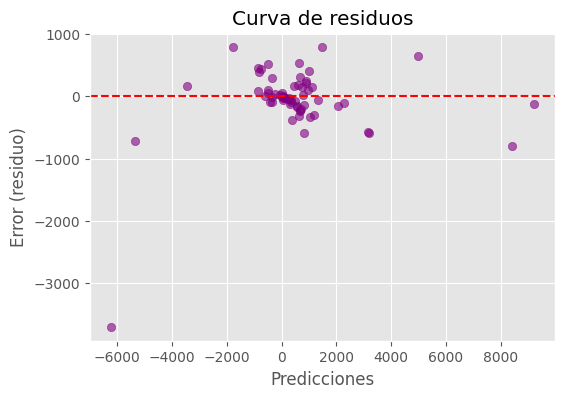

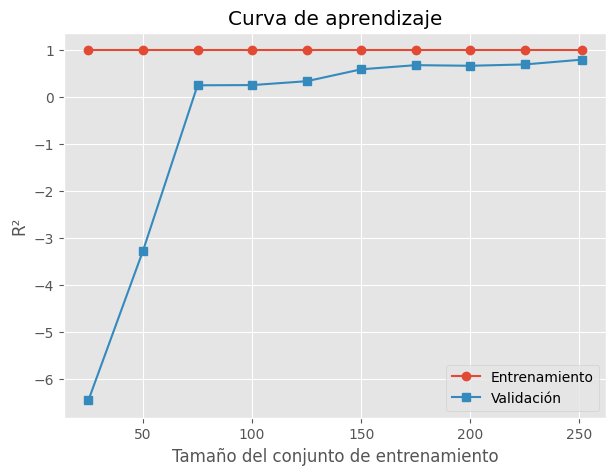

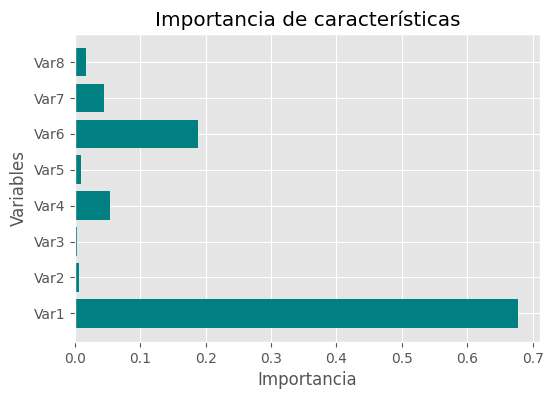

In [ ]:
# CURVA: Predicción vs Valor Real
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicción vs Valor real')
plt.grid(True)
plt.show()

# CURVA: Residuos
residuos = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuos, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Error (residuo)')
plt.title('Curva de residuos')
plt.grid(True)
plt.show()

#  CURVA: Learning Curve (Curva de aprendizaje)
train_sizes, train_scores, test_scores = learning_curve(
    gbr, X, y, cv=5,
    scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 's-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de aprendizaje')
plt.legend()
plt.grid(True)
plt.show()

# CURVA: Importancia de características
if hasattr(gbr, 'feature_importances_'):
    importancia = gbr.feature_importances_
    features = [f'Var{i+1}' for i in range(X.shape[1])]
    plt.figure(figsize=(6,4))
    plt.barh(features, importancia, color='teal')
    plt.xlabel('Importancia')
    plt.ylabel('Variables')
    plt.title('Importancia de características')
    plt.grid(True, axis='x')
    plt.show()
else:
    print("⚠️ Este modelo no tiene atributo 'feature_importances_'.")

**MLP REGRESSOR (RED NEURONAL)**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#NORMALIZACIÓN OPCIÓN 1
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)


In [ ]:
#NORMALIZACIÓN OPCIÓN 2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#dividir datos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Crear modelo MLPRegressor
modelo_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # 2 capas ocultas
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

#Entrenar
modelo_mlp.fit(X_train, y_train)

#Predecir
y_pred = modelo_mlp.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, ))#squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.614390236089595
RMSE: 2160122.476327151
MAE: 896.7234238428834


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
